[Sebastian Raschka](http://www.sebastianraschka.com)  


In [1]:
import time
print('Last updated: %s' %time.strftime('%d/%m/%Y'))

Last updated: 28/01/2018


<hr>
I would be happy to hear your comments and suggestions.  
Please feel free to drop me a note via
[twitter](https://twitter.com/rasbt), [email](mailto:bluewoodtree@gmail.com), or [google+](https://plus.google.com/118404394130788869227).
<hr>

# Linear regression via the least squares fit method

<a name="sections"></a>
<br>
<br>


# Sections

- [Introduction](#Introduction)

- [Least squares fit implementations](#Least-squares-fit-implementations)

    - [The matrix approach in Python and NumPy](#The-matrix-approach-in-Python-and-NumPy)
    
    - [The classic approach in Python](#The-classic-approach-in-Python)
    
- [Visualization](#Visualization)

- [Performance growth rates](#Performance-growth-rates)

- [Results](#Results)

<a name="introduction"></a>
<br>
<br>

# Introduction

[[back to top](#Sections)]

Linear regression via the least squares method is the simplest approach to performing a regression analysis of a dependent and a explanatory variable. The objective is to find the best-fitting straight line through a set of points that minimizes the sum of the squared offsets from the line.  
The offsets come in 2 different flavors: perpendicular and vertical - with respect to the line.  
![](https://raw.githubusercontent.com/rasbt/python_reference/master/Images/least_squares_vertical.png)  
![](https://raw.githubusercontent.com/rasbt/python_reference/master/Images/least_squares_perpendicular.png)  

As Michael Burger summarizes it nicely in his article "[Problems of Linear Least Square Regression - And Approaches to Handle Them](http://www.arsa-conf.com/archive/?vid=1&aid=2&kid=60101-220)": "the perpendicular offset method delivers a more precise result but is are more complicated to handle. Therefore normally the vertical offsets are used."  
Here, we will also use the method of computing the vertical offsets.



In more mathematical terms, our goal is to compute the best fit to *n* points $(x_i, y_i)$ with $i=1,2,...n,$ via linear equation of the form  
$f(x) = a\cdot x + b$.  
We further have to assume that the y-component is  functionally dependent on the x-component.  
In a cartesian coordinate system, $b$ is the intercept of the straight line with the y-axis, and $a$ is the slope of this line.

In order to obtain the parameters for the linear regression line for a set of multiple points, we can re-write the problem as matrix equation  
$\pmb X \; \pmb a = \pmb y$

$\Rightarrow\Bigg[ \begin{array}{cc}
x_1 & 1  \\
... & 1 \\
x_n & 1  \end{array} \Bigg]$
$\bigg[ \begin{array}{c}
a  \\
b \end{array} \bigg]$
$=\Bigg[ \begin{array}{c}
y_1   \\
...  \\
y_n  \end{array} \Bigg]$

With a little bit of calculus, we can rearrange the term in order to obtain the parameter vector $\pmb a = [a\;b]^T$

$\Rightarrow \pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$

<br>
The more classic approach to obtain the slope parameter $a$ and y-axis intercept $b$ would be:

$a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$  (slope)


$b = \bar{y} - a\bar{x}\quad$ (y-axis intercept)

where 


$S_{xy} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad$ (covariance)


$\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad$ (variance)

<a name="implementations"></a>
<br>
<br>

# Least squares fit implementations

[[back to top](#Sections)]

<a name='matrix_approach'></a>
<br>
<br>

### The matrix approach in Python and NumPy

[[back to top](#Sections)]

First, let us implement the equation:

$\pmb a = (\pmb X^T \; \pmb X)^{-1} \pmb X^T \; \pmb y$

which I will refer to as the "matrix approach".

#### Matrix approach implemented in NumPy and (C)Python

In [2]:
import numpy as np

def matrix_lstsqr(x, y):
    """ Computes the least-squares solution to a linear matrix equation. """
    X = np.vstack([x, np.ones(len(x))]).T
    return (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)

<a name='classic_approach'></a>
<br>
<br>

### The classic approach in Python

[[back to top](#Sections)]

Next, we will calculate the parameters separately, using standard library functions in Python only, which I will call the "classic approach".

$a = \frac{S_{x,y}}{\sigma_{x}^{2}}\quad$  (slope)


$b = \bar{y} - a\bar{x}\quad$ (y-axis intercept)

Note: I refrained from using list comprehensions and convenience functions such as `zip()` in
order to maximize the performance for the Cython compilation into C code in the later sections.
    

#### Implemented in (C)Python

In [3]:
def classic_lstsqr(x_list, y_list):
    """ Computes the least-squares solution to a linear matrix equation. """
    N = len(x_list)
    x_avg = sum(x_list)/N
    y_avg = sum(y_list)/N
    var_x, cov_xy = 0, 0
    for x,y in zip(x_list, y_list):
        temp = x - x_avg
        var_x += temp**2
        cov_xy += temp * (y - y_avg)
    slope = cov_xy / var_x
    y_interc = y_avg - slope*x_avg
    return (slope, y_interc)

<a name='sample_data'></a>
<br>
<br>

<br>
<br>

## Visualization

[[back to top](#Sections)]

To check how our dataset is distributed, and how the least squares regression line looks like, we will plot the results in a scatter plot.  
Note that we are only using our "matrix approach" to visualize the results - for simplicity. We expect both approaches to produce similar results, which we confirm with the code snippet below.

In [4]:
import random
import numpy as np

random.seed(12345)

x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

np.testing.assert_almost_equal(
    classic_lstsqr(x, y), matrix_lstsqr(x, y), decimal=5)  
    
print('ok')

ok


In [5]:
%matplotlib inline

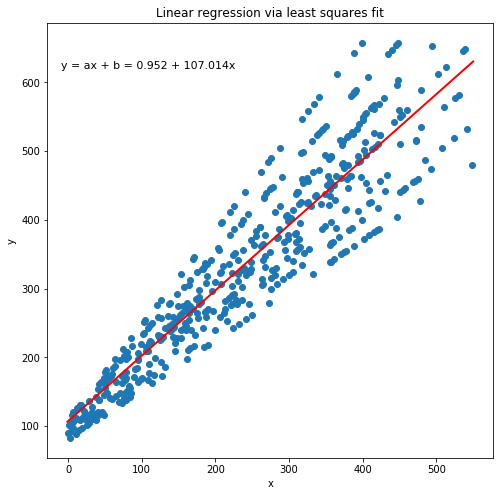

In [6]:
from matplotlib import pyplot as plt
import random

random.seed(12345)

x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

slope, intercept = matrix_lstsqr(x, y)

line_x = [round(min(x)) - 1, round(max(x)) + 1]
line_y = [slope*x_i + intercept for x_i in line_x]

plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.plot(line_x, line_y, color='red', lw='2')

plt.ylabel('y')
plt.xlabel('x')
plt.title('Linear regression via least squares fit')

ftext = 'y = ax + b = {:.3f} + {:.3f}x'\
        .format(slope, intercept)
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')

plt.show()

<br>
<br>

<a name='performance1'></a>
<br>
<br>

# Performance growth rates

[[back to top](#Sections)]

Now, finally let us take a look at the effect of different sample sizes on the relative performances for each approach.

In [7]:
import timeit
import random
random.seed(12345)

funcs =  ['classic_lstsqr', 'matrix_lstsqr']

orders_n = [10**n for n in range(1,5)]
timings = {f:[] for f in funcs}

for n in orders_n:
    x_list = ([x_i*np.random.randint(8,12)/10 for x_i in range(n)])
    y_list = ([y_i*np.random.randint(10,14)/10 for y_i in range(n)])
    x_ary = np.asarray(x_list)
    y_ary = np.asarray(y_list)
    timings['classic_lstsqr'].append(min(timeit.Timer('classic_lstsqr(x_list, y_list)', 
            'from __main__ import classic_lstsqr, x_list, y_list')\
                                         .repeat(repeat=3, number=1000)))
    timings['matrix_lstsqr'].append(min(timeit.Timer('matrix_lstsqr(x_ary, y_ary)', 
            'from __main__ import matrix_lstsqr, x_ary, y_ary')\
                                         .repeat(repeat=3, number=1000)))

In [8]:
import platform
import multiprocessing

def print_sysinfo():
    
    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())
    print('NumPy version   :', np.__version__)
    
    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', multiprocessing.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

In [9]:
import matplotlib.pyplot as plt

def plot(timings, title, labels, orders_n):
    plt.rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(11,10))
    for lb in labels:
        plt.plot(orders_n, timings[lb], alpha=0.5, label=labels[lb], 
                 marker='o', lw=3)
    plt.xlabel('sample size n')
    plt.ylabel('time per computation in milliseconds')
    #plt.xlim([min(orders_n) / 10, max(orders_n)* 10])
    plt.legend(loc=2)
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.show()

<br>
<br>

# Results

[[back to top](#Sections)]


Python version  : 3.6.3
compiler        : GCC 7.2.0
NumPy version   : 1.13.1

system     : Linux
release    : 4.4.86+
machine    : x86_64
processor  : x86_64
CPU count  : 8
interpreter: 64bit





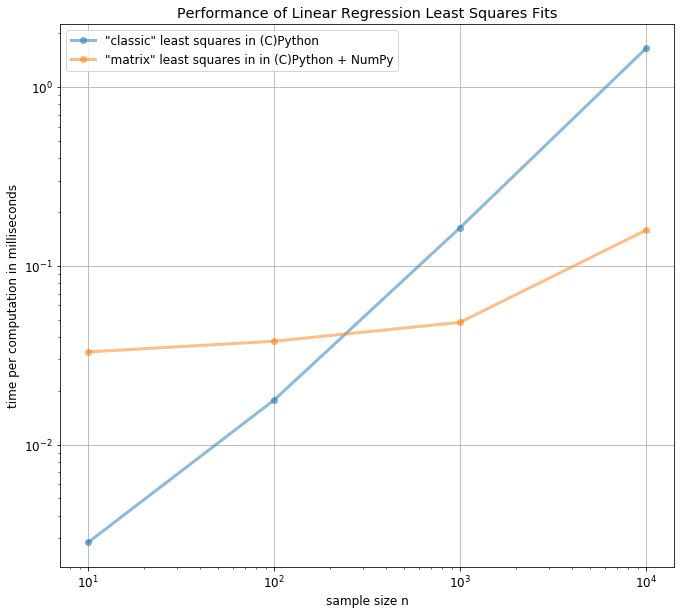

In [10]:
title = 'Performance of Linear Regression Least Squares Fits'

labels = {'classic_lstsqr': '"classic" least squares in (C)Python',
          'matrix_lstsqr': '"matrix" least squares in in (C)Python + NumPy',
         }

print_sysinfo()
plot(timings, title, labels, orders_n)

In [ ]:
test complete; Gopal